In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy import signal
from scipy.signal import butter, sosfilt, sosfreqz

In [3]:
walk = pd.read_csv('data/2019-11-2514.35.09.csv').dropna(axis='columns')
# walk = pd.read_csv('data/walk-2019-11-2222.14.11.csv').dropna(axis='columns')

In [4]:
walk = walk[['time', 'ax', 'ay', 'az']]
walk

,time,ax,ay,az
0,0.004,0.13,0.04,-0.05
1,0.005,0.11,0.06,-0.02
2,0.005,0.11,0.06,-0.02
3,0.005,0.07,0.05,0.04
4,0.005,0.07,0.05,0.04
...,...,...,...,...
33925,53.995,-0.66,-0.56,-1.56
33926,53.997,-0.66,-0.56,-1.56
33927,53.999,-0.66,-0.56,-1.56
33928,53.999,-0.77,-0.54,-1.98


In [5]:
def vectorAcceleration(df):
    '''
        calculate vector acceleration
    '''
    return np.sqrt(df['ax']**2 + df['ay']**2 + df['az']**2)

# df = pd.DataFrame(columns=['time', 'acceleration', 'gyro', 'g_removed'])
# df['time'] = walk['time']
walk['magnitude_acc'] = walk.apply(vectorAcceleration, axis=1)

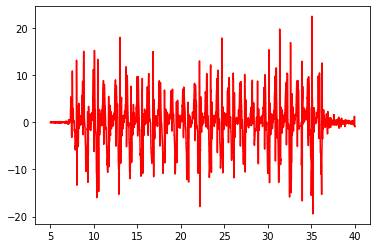

In [7]:
# walk
df1 = walk.loc[(walk['time'] > 5) & (walk['time'] < 40)]
x1 = df1['time']
plt.plot(x1, df1.ax, 'r')
# plt.plot(x, df.ay)
# plt.plot(x, df.az)
# plt.plot(x, df.magnitude_acc, 'b')
plt.show()

In [8]:
# fs = 210.0
# lowcut = 50
# highcut = 150
# b, a = signal.butter(3, 0.05, btype='lowpass', analog=False)
# walk['magnitude_acc'] = signal.filtfilt(b, a, walk['magnitude_acc'])

In [9]:
# df = walk.loc[(walk['time'] > 5) & (walk['time'] < 40)]
# x = df['time']
# # plt.plot(x, df.ax, 'r')
# # plt.plot(x, df.ay)
# # plt.plot(x, df.az)
# plt.plot(x, df.magnitude_acc, 'b')
# plt.show()

In [10]:
# from scipy.signal import butter, sosfilt, sosfreqz
def butter_bandpass(lowcut, highcut, fs, order=3):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [0.25, 0.75], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=3):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

fs = 200.0
lowcut = 50.0
highcut = 150.0
walk['magnitude_acc_filtered'] = butter_bandpass_filter(walk['magnitude_acc'], lowcut, highcut, fs, order=3)

In [11]:
walk['ax_filtered'] = butter_bandpass_filter(walk['ax'], lowcut, highcut, fs, order=3)
walk['ay_filtered'] = butter_bandpass_filter(walk['ay'], lowcut, highcut, fs, order=3)
walk

,time,ax,ay,az,magnitude_acc,magnitude_acc_filtered,ax_filtered,ay_filtered
0,0.004,0.13,0.04,-0.05,0.144914,0.024152,0.021667,0.006667
1,0.005,0.11,0.06,-0.02,0.126886,0.021148,0.018333,0.010000
2,0.005,0.11,0.06,-0.02,0.126886,-0.051309,-0.046667,-0.010000
3,0.005,0.07,0.05,0.04,0.094868,-0.047631,-0.043333,-0.021667
4,0.005,0.07,0.05,0.04,0.094868,0.016775,0.014444,-0.003889
...,...,...,...,...,...,...,...,...
33925,53.995,-0.66,-0.56,-1.56,1.784040,-0.050817,0.015861,-0.002803
33926,53.997,-0.66,-0.56,-1.56,1.784040,0.183246,-0.052291,-0.019941
33927,53.999,-0.66,-0.56,-1.56,1.784040,-0.127122,0.037534,0.016483
33928,53.999,-0.77,-0.54,-1.98,2.192008,-0.073714,0.016521,0.018522


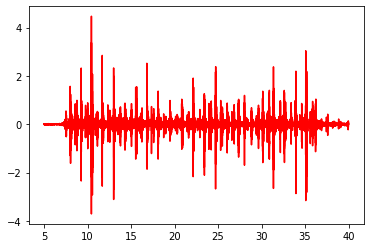

In [12]:
df2 = walk.loc[(walk['time'] > 5) & (walk['time'] < 40)]
x2 = df2['time']
# plt.plot(x2, df2.ax, 'r')
# plt.plot(x, df.ay)
# plt.plot(x, df.az)
# plt.plot(x2, df2.magnitude_acc, 'b')
plt.plot(x2, df2.magnitude_acc_filtered, 'r')
plt.show()

In [13]:
from scipy import integrate
def vel_integration(acc_lst, time_lst):
    acc = np.array(acc_lst, dtype=np.float64)
    vel = integrate.cumtrapz(acc, time_lst, initial=0)
#     dist = integrate.cumtrapz(vel, time, initial=0)
    return vel

vel_x = vel_integration(df2.ax_filtered, x2)
vel_y = vel_integration(df2.ay_filtered, x2)

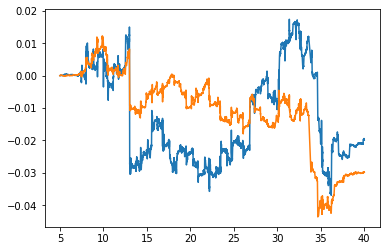

In [14]:
plt.plot(x2, vel_x)
plt.plot(x2, vel_y)
plt.show()

In [15]:
vel = np.square(vel_x)+ np.square(vel_y)
type(vel_x)

numpy.ndarray

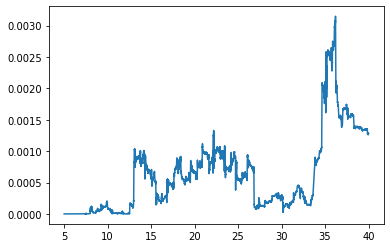

In [16]:
plt.plot(x2, vel)
plt.show()

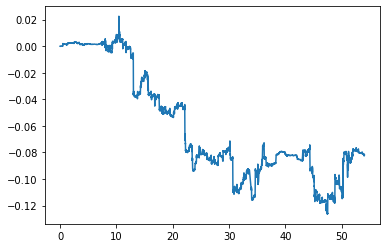

In [17]:
vel_acc_filtered = vel_integration(walk.magnitude_acc_filtered, walk.time) 
plt.plot(walk.time, vel_acc_filtered)
plt.show()